In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from dotenv import load_dotenv, find_dotenv
import os
from datetime import date, timedelta

pd.set_option("display.max_columns", None)


In [2]:
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
FACEIT_PLAYERID = os.environ.get("FACEIT_PLAYERID")


In [3]:
DF_all = pd.read_pickle("./AllDatabz2.pkl", compression="bz2")


In [5]:
DF_me = DF_all.query("PlayerId == @FACEIT_PLAYERID")
DF_others:pd.DataFrame = DF_all.query("PlayerId != @FACEIT_PLAYERID")

In [51]:
DF_others_grouped = DF_others.groupby(["PlayerId", "Year"], as_index=False).agg(
    {
        "Kills": "mean",
        "Assists": "mean",
        "Deaths": "mean",
        "Headshots%": "mean",
        "Rounds": "mean",
        "Map": pd.Series.mode,
    }
)


In [52]:
DF_others_grouped

,PlayerId,Year,Kills,Assists,Deaths,Headshots%,Rounds,Map
0,003185fd-320b-4563-b428-9adb0b2d4762,2017,11.0000,3.0000,16.50,28.500,22.50,de_dust2
1,003185fd-320b-4563-b428-9adb0b2d4762,2018,20.6000,2.6500,16.95,46.050,24.30,de_mirage
2,003185fd-320b-4563-b428-9adb0b2d4762,2019,19.3000,3.6400,18.10,46.140,25.06,de_mirage
3,003185fd-320b-4563-b428-9adb0b2d4762,2020,21.4000,6.2000,22.00,51.200,28.80,de_inferno
4,003185fd-320b-4563-b428-9adb0b2d4762,2021,21.7500,5.0000,16.75,54.250,22.50,de_inferno
...,...,...,...,...,...,...,...,...
3110,ffdfd2db-bf39-4d07-8939-8aa250865535,2018,17.0000,7.0000,21.00,53.000,28.00,de_train
3111,ffdfd2db-bf39-4d07-8939-8aa250865535,2019,23.0000,3.5000,18.00,50.500,26.50,de_mirage
3112,fff0e5d4-e56f-4058-923a-1aede4301022,2016,24.7500,6.5000,23.00,43.750,33.25,de_mirage
3113,fff0e5d4-e56f-4058-923a-1aede4301022,2017,17.3200,4.3400,16.78,43.080,24.06,de_cache


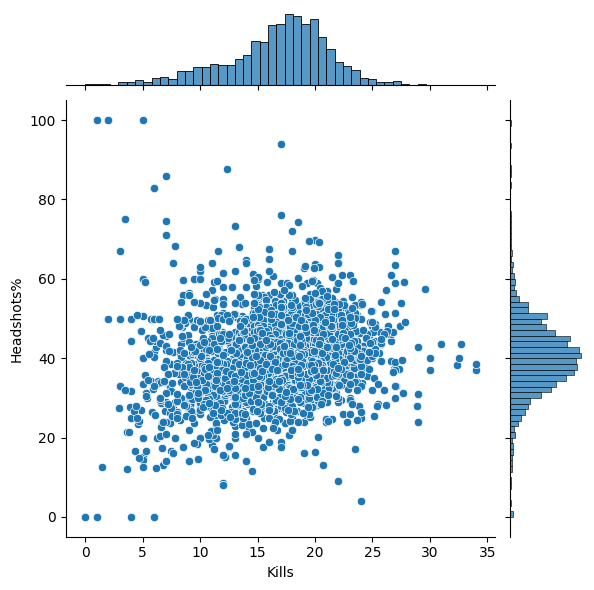

In [53]:
sns.jointplot(data = DF_others_grouped, x = "Kills", y = "Headshots%", kind="scatter")